# Decision Trees using SVM *(Support Vector Machine)*

In [213]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler, normalize
%matplotlib inline

In [214]:
df = pd.read_csv("../data/creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [216]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [217]:
df.isnull().sum().sum()

np.int64(0)

In [218]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


<Axes: >

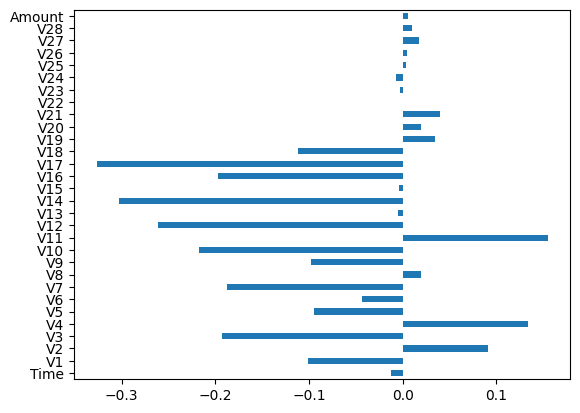

In [219]:
corr = df.corr()['Class'].drop('Class')
corr.plot(kind = 'barh')

Good p = V(27, 21, 20, 19, 11, 8, 4, 2)<br>
Good N = V(18 ,17 ,16 ,14 ,12 ,10 ,9 ,7 ,6 ,5 ,3 ,1)

In [220]:
df.corrwith(df['Class'])

Time     -0.012323
V1       -0.101347
V2        0.091289
V3       -0.192961
V4        0.133447
V5       -0.094974
V6       -0.043643
V7       -0.187257
V8        0.019875
V9       -0.097733
V10      -0.216883
V11       0.154876
V12      -0.260593
V13      -0.004570
V14      -0.302544
V15      -0.004223
V16      -0.196539
V17      -0.326481
V18      -0.111485
V19       0.034783
V20       0.020090
V21       0.040413
V22       0.000805
V23      -0.002685
V24      -0.007221
V25       0.003308
V26       0.004455
V27       0.017580
V28       0.009536
Amount    0.005632
Class     1.000000
dtype: float64

Their approach

In [221]:
# standardize features by removing the mean and scaling to unit variance
df.iloc[:, 1:30] = StandardScaler().fit_transform(df.iloc[:, 1:30])
data_matrix = df.values

# X: feature matrix (for this analysis, we exclude the Time variable from the dataset)
x = data_matrix[:, 1:30]

# y: labels vector
y = data_matrix[:, 30]

# data normalization
x = normalize(x, norm="l1")

In [222]:
v_col = [col for col in df.columns if col.startswith('V') and len(col) <= 3]

corr_val = df[v_col].corrwith(df['Class'])

from decimal import Decimal

def has_nonzero_first_two_decimal(value):
    try:
        dec = Decimal(str(value))
        frac_str = str(dec % 1)[2:]  # skip '0.'
        return len(frac_str) >= 2 and frac_str[:2] != '00'
    except:
        return False

good_pv = [col for col in corr_val.index if has_nonzero_first_two_decimal(corr_val[col]) and corr_val[col] > 0 ]
good_nv = [col for col in corr_val.index if has_nonzero_first_two_decimal(corr_val[col]) and corr_val[col] < 0 ]


In [223]:
df['PV_good'] =  df[good_pv].mean(axis= 1)
df['NV_good'] = df[good_nv].mean(axis= 1)
df['V'] = df[v_col].mean(axis= 1)
df = df [['Time', 'Amount', 'Class', 'PV_good', 'NV_good', 'V']]
df

,Time,Amount,Class,PV_good,NV_good,V
0,0.0,0.244964,0,0.199986,0.064130,0.099981
1,0.0,-0.342475,0,0.191328,0.133054,0.121635
2,1.0,1.160686,0,-0.202654,0.142084,0.022052
3,1.0,0.140534,0,-0.300485,-0.107495,-0.112452
4,2.0,-0.073403,0,0.228912,0.138109,0.229974
...,...,...,...,...,...,...
284802,172786.0,-0.350151,0,1.612422,-0.361718,0.465585
284803,172787.0,-0.254117,0,-0.226912,0.049701,-0.067566
284804,172788.0,-0.081839,0,0.004953,0.345202,0.235992
284805,172788.0,-0.313249,0,0.479790,0.109367,0.251754


In [224]:
df.describe()

,Time,Amount,Class,PV_good,NV_good,V
count,284807.000000,2.848070e+05,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05
mean,94813.859575,2.913952e-17,0.001727,-3.991715e-19,5.388815e-18,1.846168e-18
std,47488.145955,1.000002e+00,0.041527,3.535540e-01,2.500004e-01,1.889826e-01
min,0.000000,-3.532294e-01,0.000000,-1.101242e+01,-9.167551e+00,-6.397030e+00
25%,54201.500000,-3.308401e-01,0.000000,-1.582803e-01,-9.183205e-02,-9.099528e-02
50%,84692.000000,-2.652715e-01,0.000000,3.953265e-03,5.578319e-03,1.167016e-02
75%,139320.500000,-4.471707e-02,0.000000,1.702439e-01,1.011422e-01,1.019151e-01
max,172792.000000,1.023622e+02,1.000000,5.464053e+00,1.826790e+00,1.685579e+00


In [225]:
df.corrwith(df['Class'])

Time      -0.012323
Amount     0.005632
Class      1.000000
PV_good    0.181144
NV_good   -0.537785
V         -0.306280
dtype: float64

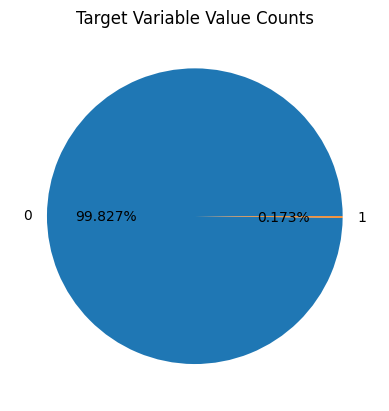

In [226]:
labels = df.Class.unique()

sizes = df.Class.value_counts().values

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.3f%%')
ax.set_title('Target Variable Value Counts')
plt.show()

#### Unbalanced Binary dataset

We can either:
- Downsample & upweight the majority class
- Bias the model to pay more attention to the samples in the minority class

<Axes: >

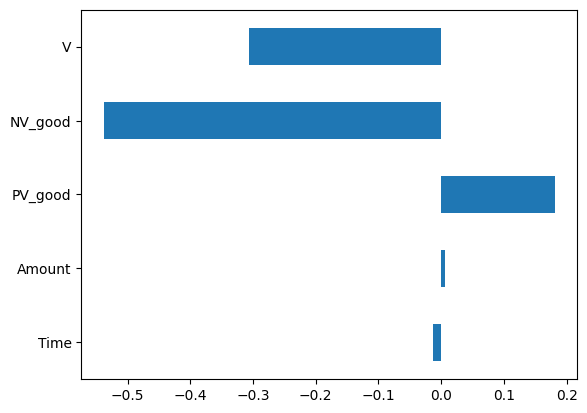

In [227]:
corr = df.corr()['Class'].drop('Class')
corr.plot(kind = 'barh')

Preprocessing

In [228]:
df.columns

Index(['Time', 'Amount', 'Class', 'PV_good', 'NV_good', 'V'], dtype='object')

In [229]:
sc = StandardScaler()

X = sc.fit_transform(df.iloc[:, [3,4]])
Y = df.iloc[:, 2].to_numpy().reshape(-1)

X = normalize(X, norm = 'l1')

In [230]:
from sklearn.model_selection import train_test_split


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state= 42 , test_size=0.3)

In [231]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state= 42 , test_size=0.3)

In [232]:
from sklearn.utils import compute_sample_weight


W_train = compute_sample_weight('balanced', Y_train)
w_train = compute_sample_weight('balanced', y_train)

In [233]:
from sklearn.tree import DecisionTreeClassifier


Dt = DecisionTreeClassifier(max_depth= 4, random_state= 35)
Dt.fit(X_train, Y_train, sample_weight= W_train)

dt = DecisionTreeClassifier(max_depth= 4, random_state= 35)
dt.fit(x_train, y_train, sample_weight= W_train)


,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,35
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [234]:
from sklearn.svm import LinearSVC


svm = LinearSVC(class_weight= 'balanced', random_state= 31, loss = 'hinge', fit_intercept= False)

svm.fit(X_train, Y_train)

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,penalty,'l2'
,loss,'hinge'
,dual,'auto'
,tol,0.0001
,C,1.0
,multi_class,'ovr'
,fit_intercept,False
,intercept_scaling,1
,class_weight,'balanced'
,verbose,0
,random_state,31


In [235]:
Y_pred_Dt = Dt.predict_proba(X_test)[ : ,1]
Y_pred_Dt

array([0.93412484, 0.12360278, 0.25142053, ..., 0.23828157, 0.12360278,
       0.12360278])

In [236]:
from sklearn.metrics import roc_auc_score

roc_auc_Dt = roc_auc_score(Y_test, Y_pred_Dt)

print('Decision Tree ROC-AUC score : {0:.3f}'.format(roc_auc_Dt * 100))

Decision Tree ROC-AUC score : 89.879


In [237]:
Y_pred_svm = svm.decision_function(X_test)

In [238]:
roc_auc_svm = roc_auc_score(Y_test, Y_pred_svm)

print('Decision Tree ROC-AUC score using SVM : {0:.3f}'.format(roc_auc_svm * 100))

Decision Tree ROC-AUC score using SVM : 90.230


In [239]:
svm.fit(x_train, y_train)

,penalty,'l2'
,loss,'hinge'
,dual,'auto'
,tol,0.0001
,C,1.0
,multi_class,'ovr'
,fit_intercept,False
,intercept_scaling,1
,class_weight,'balanced'
,verbose,0
,random_state,31


In [240]:
y_pred_dt = dt.predict_proba(x_test)[ : ,1]

roc_auc_dt = roc_auc_score(y_test, y_pred_dt)

print('Decision Tree ROC-AUC score : {0:.3f}'.format(roc_auc_dt * 100))

Decision Tree ROC-AUC score : 93.885


In [241]:
y_pred_svm = svm.decision_function(x_test)

roc_auc_svm = roc_auc_score(y_test, y_pred_svm)

print('Decision Tree ROC-AUC score using SVM : {0:.3f}'.format(roc_auc_svm * 100))

Decision Tree ROC-AUC score using SVM : 98.581
